## Original link
https://archive.ics.uci.edu/ml/datasets/Wine+Quality

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
from helpers import plot_confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import minmax_scale

In [4]:
%matplotlib inline

## Загружаем данные

In [5]:
dataset = pd.read_csv('./data/winequality-red.csv', sep=';')

In [6]:
dataset.shape

(1599, 12)

In [7]:
f_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

In [8]:
X = dataset[f_names].values
y = dataset['quality'].values

### Выполняем преобразование признаков

In [9]:
X = minmax_scale(X)

### Разделяем выборку на train и test

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

## Обучаем модель 

In [11]:
# model = LinearRegression()
model = Lasso(alpha=0.01)
# model = ElasticNet(alpha=1.5, l1_ratio=0.7)

In [12]:
model.fit(X_train, y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

### Оцениваем получившиеся параметры модели

In [13]:
pd.DataFrame(data=np.array([f_names, model.coef_]).T, columns=['F_NAME','COEF'])

,F_NAME,COEF
0,fixed acidity,0.0806276155312682
1,volatile acidity,-1.3671687998583846
2,citric acid,0.0
3,residual sugar,-0.0
4,chlorides,-0.0
5,free sulfur dioxide,-0.0
6,total sulfur dioxide,-0.0
7,density,-0.0
8,pH,-0.0
9,sulphates,0.09872028063454247


## Смотрим на метрики для test-части

In [14]:
y_pred = model.predict(X_test)

In [15]:
r2_score(y_pred=y_pred, y_true=y_test)

0.28616799065733023

In [16]:
mean_absolute_error(y_pred=y_pred, y_true=y_test)

0.5356478562603832

In [17]:
mean_squared_error(y_pred=y_pred, y_true=y_test)

0.4538781859403808

### Визуализируем матрицу ошибок

In [18]:
y_pred_round = np.round(y_pred)
labels = np.array([str(i) for i in range(0,10)])

[]

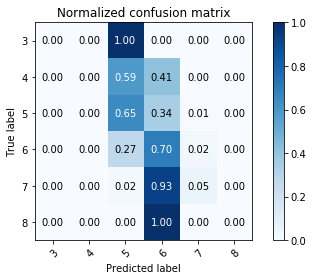

In [19]:
plot_confusion_matrix(classes=labels, y_pred=y_pred_round, y_true=y_test, normalize=True)
plt.plot()

[]

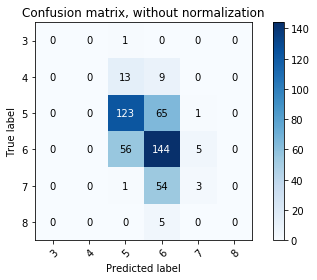

In [20]:
plot_confusion_matrix(classes=labels, y_pred=y_pred_round, y_true=y_test)
plt.plot()

### Визуализируем ошибки предсказаний

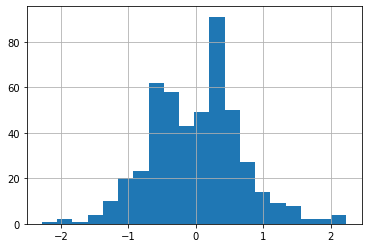

In [21]:
plt.hist((y_pred-y_test), bins=20)
plt.grid()
plt.show()